<a href="https://colab.research.google.com/github/3m4nu311341/Clase-Estructura-De-Datos/blob/main/Taller_1_Corte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

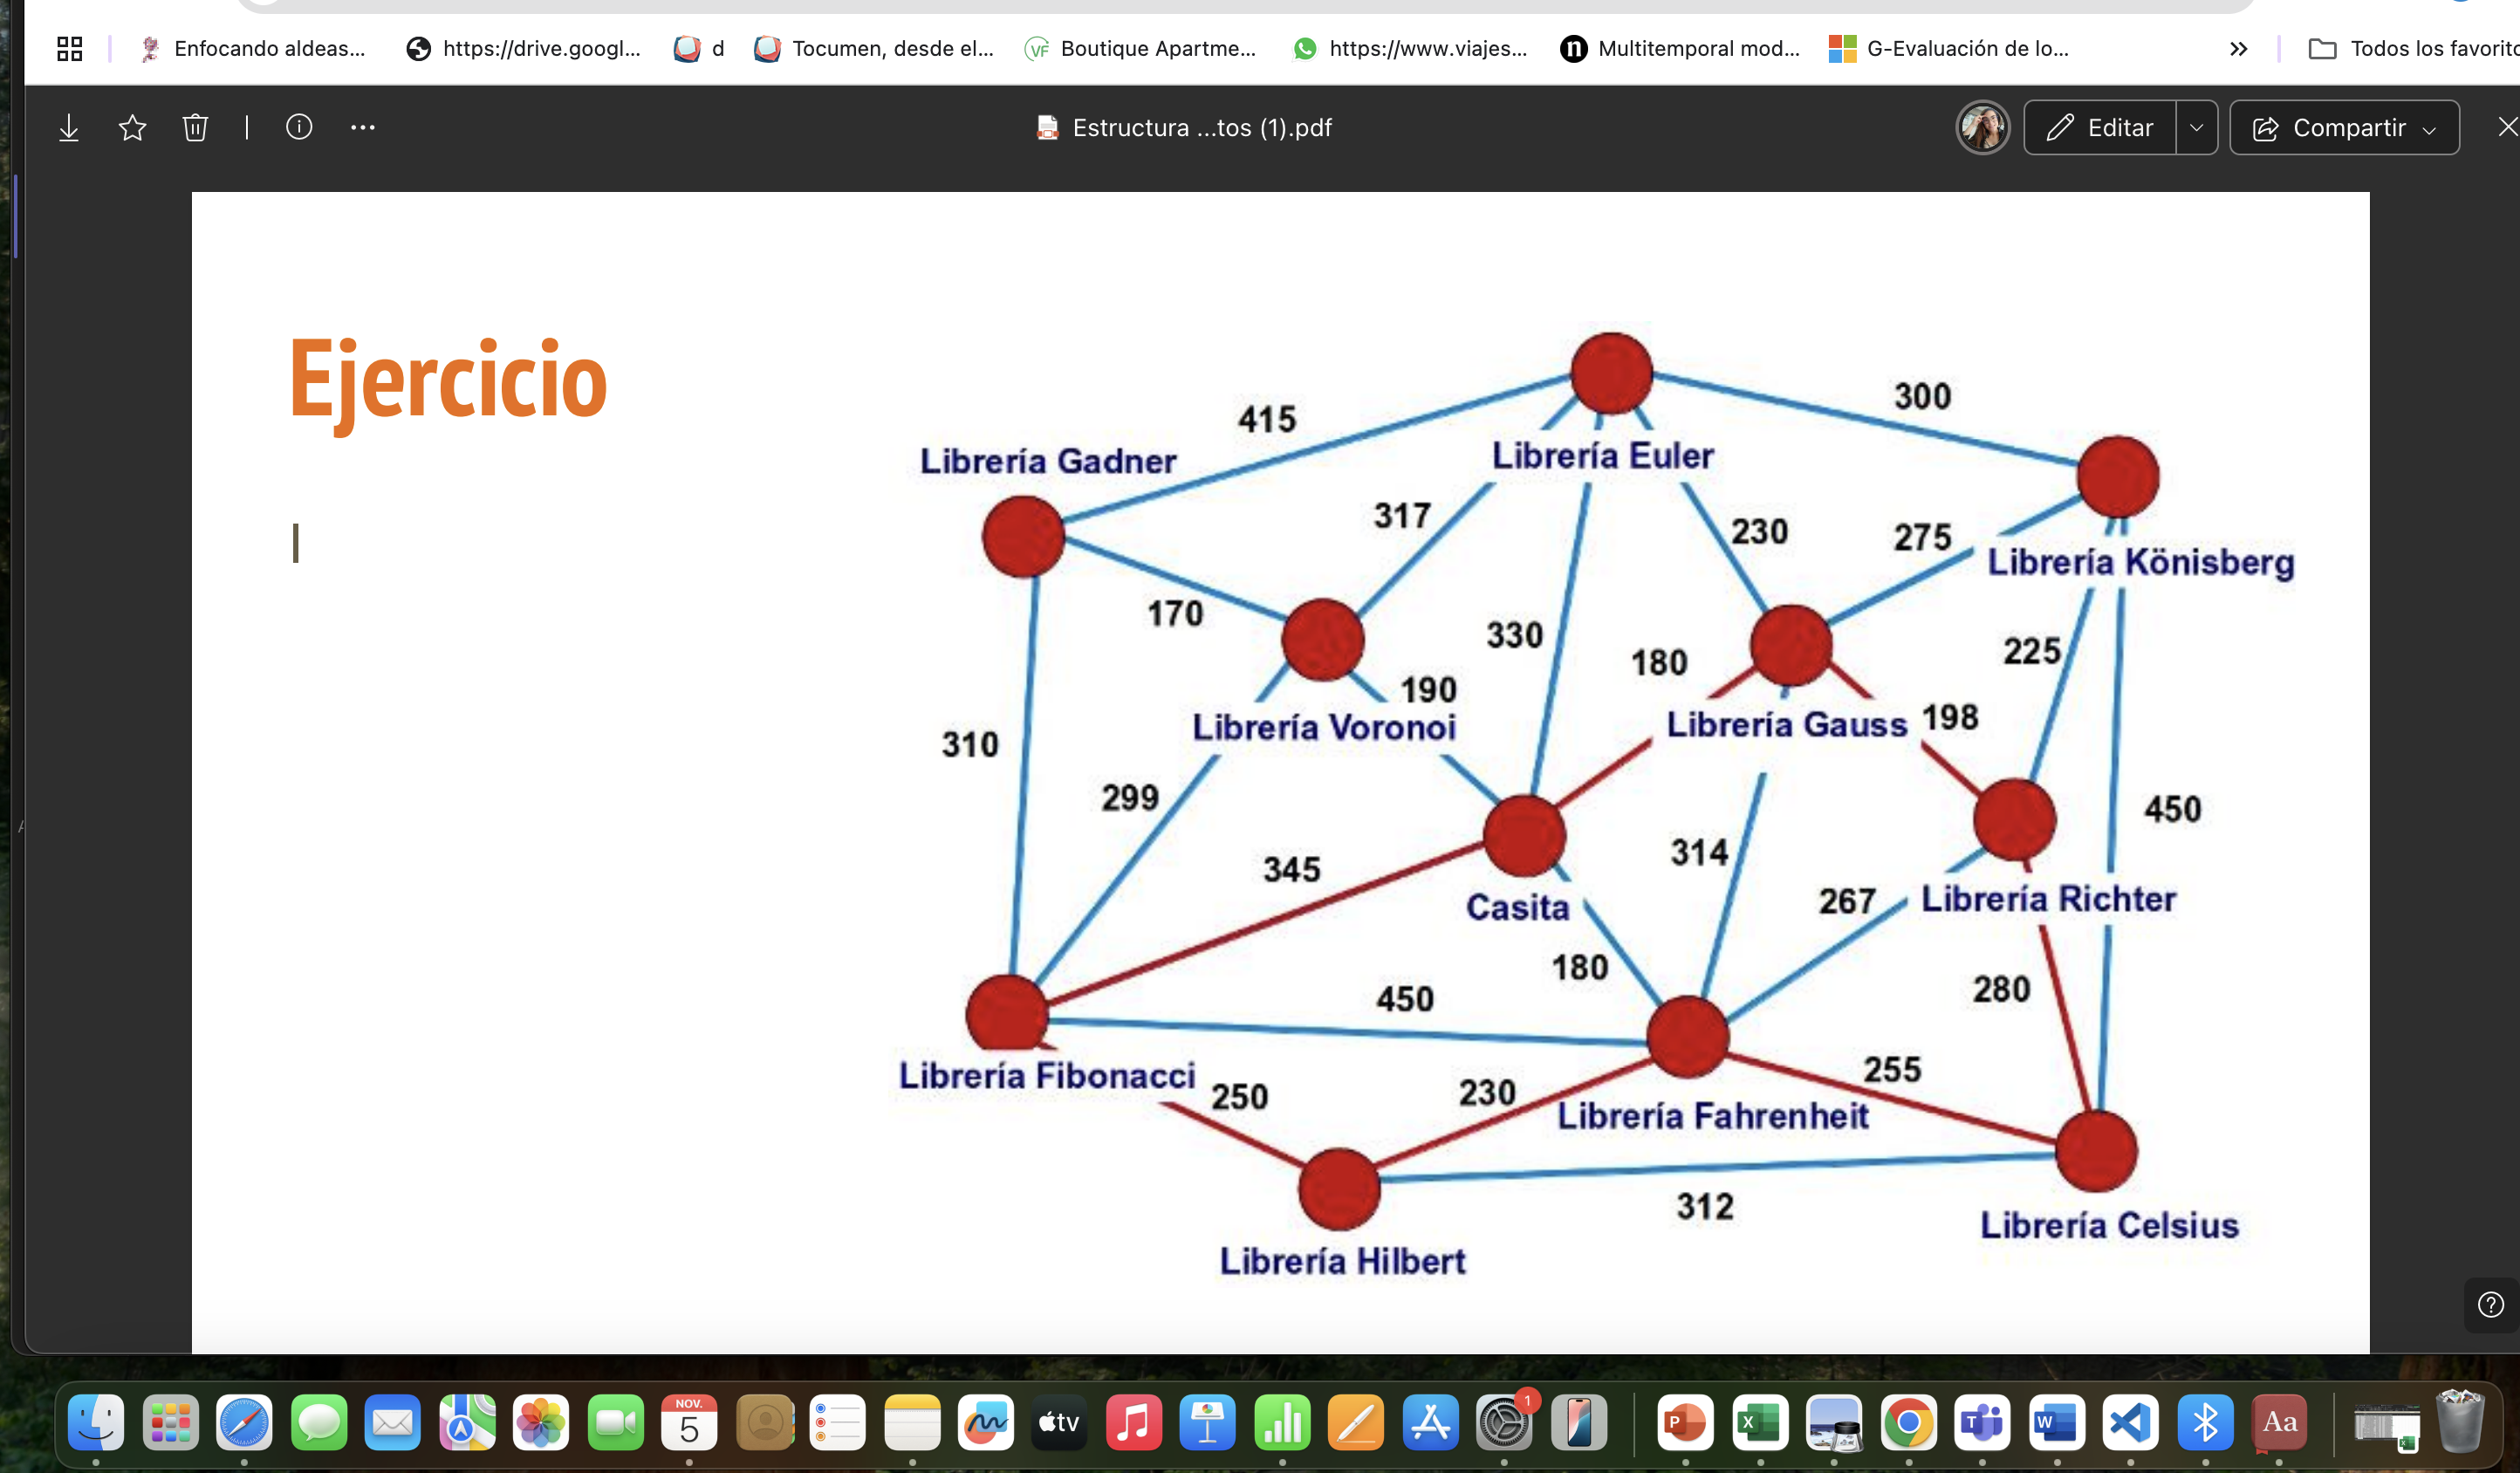

1. Encontrar matriz adyacencia y de incidencia.
2. Encontrar del siguiente esquema el método Kastra desde casita a la librería celsius , encuentre los caminos posibles y tenga en cuenta el camino más rápido para llegar entre el lugar de origen  al lugar de destino

Matriz de Adyacencia:
[[  0 415 170   0   0   0 310   0   0   0   0]
 [415   0 317 230 300 330   0   0   0   0   0]
 [170 317   0   0   0 190 299   0   0   0   0]
 [  0 230   0   0 275 180   0 314 198   0   0]
 [  0 300   0 275   0   0   0   0 225 450   0]
 [  0 330 190 180   0   0 345 180   0   0   0]
 [310   0 299   0   0 345   0 450   0   0 250]
 [  0   0   0 314   0 180 450   0 267 255 230]
 [  0   0   0 198 225   0   0 267   0 280   0]
 [  0   0   0   0 450   0   0 255 280   0 312]
 [  0   0   0   0   0   0 250 230   0 312   0]]

Matriz de Incidencia:
[[1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0

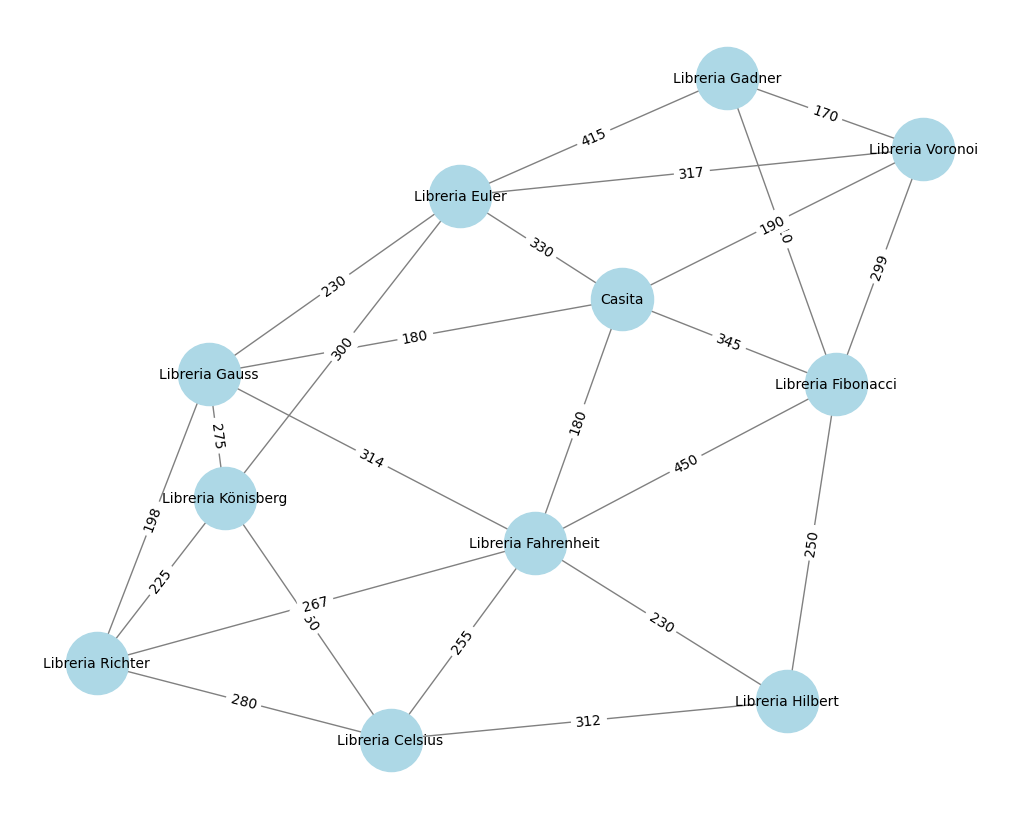

In [21]:
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Definir los nodos (vértices) y las aristas (distancias)
nodes = [
    'Libreria Gadner', 'Libreria Euler', 'Libreria Voronoi', 'Libreria Gauss', 'Libreria Könisberg', 'Casita',
    'Libreria Fibonacci', 'Libreria Fahrenheit', 'Libreria Richter', 'Libreria Celsius', 'Libreria Hilbert'
]

edges = {
    ('Libreria Gadner', 'Libreria Euler'): 415, ('Libreria Gadner', 'Libreria Voronoi'): 170, ('Libreria Gadner', 'Libreria Fibonacci'): 310,
    ('Libreria Euler', 'Libreria Gadner'): 415, ('Libreria Euler', 'Libreria Voronoi'): 317, ('Libreria Euler', 'Libreria Gauss'): 230, ('Libreria Euler', 'Libreria Könisberg'): 300, ('Libreria Euler', 'Casita'): 330,
    ('Libreria Könisberg', 'Libreria Euler'): 300, ('Libreria Könisberg', 'Libreria Gauss'): 275, ('Libreria Könisberg', 'Libreria Richter'): 225, ('Libreria Könisberg', 'Libreria Celsius'): 450,
    ('Libreria Voronoi', 'Libreria Gadner'): 170, ('Libreria Voronoi', 'Libreria Euler'): 317, ('Libreria Voronoi', 'Libreria Fibonacci'): 299, ('Libreria Voronoi', 'Casita'): 190,
    ('Libreria Gauss', 'Libreria Euler'): 230, ('Libreria Gauss', 'Libreria Könisberg'): 275, ('Libreria Gauss', 'Libreria Fahrenheit'): 314, ('Libreria Gauss', 'Casita'): 180,('Libreria Gauss', 'Libreria Richter'): 198,
    ('Casita', 'Libreria Voronoi'): 190, ('Casita', 'Libreria Gauss'): 180, ('Casita', 'Libreria Fibonacci'): 345, ('Casita', 'Libreria Fahrenheit'): 180, ('Casita', 'Libreria Euler'): 330,
    ('Libreria Fibonacci', 'Casita'): 345, ('Libreria Fibonacci', 'Libreria Hilbert'): 250,('Libreria Fibonacci', 'Libreria Fahrenheit'): 450,('Libreria Fibonacci', 'Libreria Voronoi'): 299,('Libreria Fibonacci', 'Libreria Gadner'): 310,
    ('Libreria Fahrenheit', 'Casita'): 180, ('Libreria Fahrenheit', 'Libreria Hilbert'): 230, ('Libreria Fahrenheit', 'Libreria Celsius'): 255,('Libreria Fahrenheit', 'Libreria Gauss'): 314,('Libreria Fahrenheit', 'Libreria Richter'): 267,('Libreria Fahrenheit', 'Libreria Fibonacci'): 450,
    ('Libreria Hilbert', 'Libreria Fahrenheit'): 230, ('Libreria Hilbert', 'Libreria Celsius'): 312, ('Libreria Hilbert', 'Libreria Fibonacci'): 250,
    ('Libreria Richter', 'Libreria Gauss'): 198, ('Libreria Richter', 'Libreria Celsius'): 280, ('Libreria Richter', 'Libreria Fahrenheit'): 267,('Libreria Richter', 'Libreria Könisberg'): 225,
    ('Libreria Celsius', 'Libreria Fahrenheit'): 255, ('Libreria Celsius', 'Libreria Richter'): 280, ('Libreria Celsius', 'Libreria Hilbert'): 312, ('Libreria Celsius', 'Libreria Könisberg'): 450,
}

# Crear la matriz de adyacencia
adj_matrix = np.zeros((len(nodes), len(nodes)), dtype=int)
for (node1, node2), distance in edges.items():
    i, j = nodes.index(node1), nodes.index(node2)
    adj_matrix[i][j] = distance
    adj_matrix[j][i] = distance  # Suponiendo un grafo no dirigido

print("Matriz de Adyacencia:")
print(adj_matrix)

# Crear la matriz de incidencia
inc_matrix = np.zeros((len(nodes), len(edges)), dtype=int)
for idx, ((node1, node2), distance) in enumerate(edges.items()):
    i, j = nodes.index(node1), nodes.index(node2)
    inc_matrix[i][idx] = 1
    inc_matrix[j][idx] = 1

print("\nMatriz de Incidencia:")
print(inc_matrix)

# Función para buscar todas las rutas posibles entre 'Casita' y 'Celsius' (DFS)
def buscar_caminos(grafo, inicio, destino, camino=[]):
    camino = camino + [inicio]
    if inicio == destino:
        return [camino]
    if inicio not in grafo:
        return []
    caminos = []
    for nodo in grafo[inicio]:
        if nodo not in camino:
            nuevos_caminos = buscar_caminos(grafo, nodo, destino, camino)
            for nuevo_camino in nuevos_caminos:
                caminos.append(nuevo_camino)
    return caminos

# Función para calcular el costo total de una ruta
def calcular_costo(grafo, camino):
    costo_total = 0
    for i in range(len(camino) - 1):
        costo_total += grafo[camino[i]][camino[i + 1]]
    return costo_total

# Buscar todas las rutas posibles desde 'Casita' a 'Celsius'
rutas_posibles = buscar_caminos(edges, "Casita", "Celsius")

# Calcular los costos de cada ruta
rutas_con_costos = [(ruta, calcular_costo(edges, ruta)) for ruta in rutas_posibles]

# Ordenar las rutas por costo
rutas_ordenadas = sorted(rutas_con_costos, key=lambda x: x[1])


def k_shortest_paths(G, source, target, k):
    paths = []
    for i in range(k):
        try:
            path = nx.shortest_path(G, source=source, target=target, weight='weight')
            distance = nx.shortest_path_length(G, source=source, target=target, weight='weight')
            paths.append((path, distance))
            # Remover las aristas del camino actual para encontrar el próximo camino corto
            for j in range(len(path) - 1):
                G.remove_edge(path[j], path[j + 1])
        except nx.NetworkXNoPath:
            break
    return paths

# Encontrar y mostrar los 4 caminos más cortos
k_paths = k_shortest_paths(G.copy(), 'Casita', 'Libreria Celsius', 4)
print("\nLos 4 caminos más cortos desde 'Casita' hasta 'Libreria Celsius':")
for i, (path, distance) in enumerate(k_paths, 1):
    print(f"Camino {i}: {' -> '.join(path)} con un costo de {distance}")

# Visualizar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d for (u, v, d) in G.edges(data='weight')})
plt.show()